In [27]:
import pandas as pd
import seaborn as sns

In [28]:
df = pd.read_excel("./EA - Data - Group 9.xlsx", sheet_name='Sales Data')

In [29]:
df.head()

,Year,Quarter,Sales,SalesPromo,AdSpend,RelPrice
0,2014,1,92,0.602118,0.0,1.1
1,2014,2,99,0.208932,1.8,0.9
2,2014,3,115,0.060245,2.8,0.1
3,2014,4,85,0.002090,1.3,0.5
4,2015,1,88,0.045102,1.4,0.6


In [30]:
df.shape

(36, 6)

In [31]:
df.describe()

,Year,Quarter,Sales,SalesPromo,AdSpend,RelPrice
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2018.000000,2.500000,129.472222,0.399153,1.758333,0.866667
std,2.618615,1.133893,166.745741,0.783047,0.651756,0.322490
min,2014.000000,1.000000,84.000000,0.002090,0.000000,0.100000
25%,2016.000000,1.750000,91.250000,0.140183,1.375000,0.700000
50%,2018.000000,2.500000,102.500000,0.248131,1.850000,0.900000
75%,2020.000000,3.250000,114.000000,0.302017,2.200000,1.025000
max,2022.000000,4.000000,1100.000000,4.000000,2.800000,1.900000


In [32]:
import matplotlib.pyplot as plt

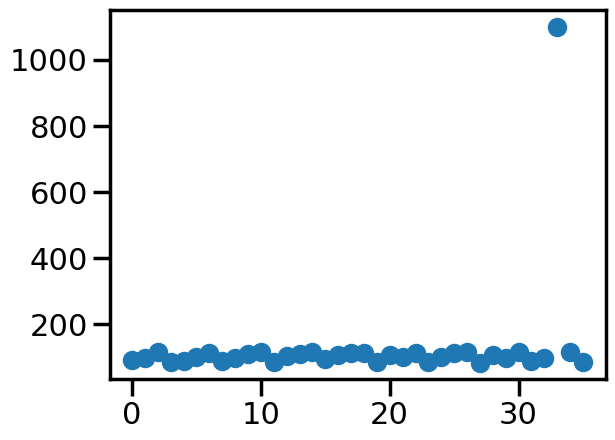

In [33]:
plt.scatter(df.index, df['Sales'])

In [34]:
q = df["Sales"].quantile(0.99)
df_noout = df[df["Sales"] < q]

In [35]:
df_noout.shape

(35, 6)

In [36]:
df_noout['Sales'].describe()

count     35.000000
mean     101.742857
std       11.257267
min       84.000000
25%       90.500000
50%      102.000000
75%      113.500000
max      116.000000
Name: Sales, dtype: float64

In [37]:
df_noout.columns

Index(['Year', 'Quarter', 'Sales', 'SalesPromo', 'AdSpend', 'RelPrice'], dtype='object')

In [38]:
import statsmodels.api as sm

In [39]:
X = df_noout[['Year', 'Quarter',  'SalesPromo', 'AdSpend', 'RelPrice']]
X = sm.add_constant(X)
Y = df_noout.Sales
linearRegression = sm.OLS(Y, X).fit()
linearRegression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     43.91
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           1.17e-12
Time:                        07:33:35   Log-Likelihood:                -96.294
No. Observations:                  35   AIC:                             204.6
Df Residuals:                      29   BIC:                             213.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        128.7924    565.488      0.228      0.821   -1027.760    1285.345
Year          -0.0297      0.280     -0.106      0.916      -0.603       0.544
Quarter       -1.0295      0.667     -1.542      0.134      -2.395       0.336
SalesPromo     4.4407      1.105      4.018      0.000       2.180       6.701
AdSpend       14.1793      1.269     11.171      0.000      11.583      16.775
RelPrice      10.2420      2.628      3.898      0.001       4.868      15.616
==============================================================================
Omnibus:                        7.912   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                6.608
Skew:                           1.011   Prob(JB):                       0.0367
Kurtosis:                       3.668   Cond. No.                     1.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/var/folders/lf/hsp4mkf14lv1k1qxwbvz70y00000gn/T/ipykernel_10798/1912784820.py:14: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


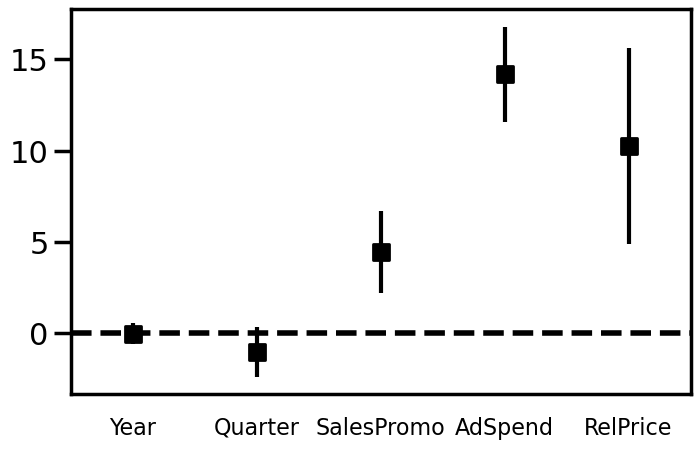

In [40]:
def coef_plot2(olsmodel):
    
    err_series = olsmodel.params - olsmodel.conf_int()[0]
    coef_df = pd.DataFrame({'coef': olsmodel.params.values[1:],
                            'err': err_series.values[1:],
                            'varname': err_series.index.values[1:]
                           })
    fig, ax = plt.subplots(figsize=(8, 5))
    coef_df.plot(x='varname', y='coef', kind='bar', 
                 ax=ax, color='none', 
                 yerr='err', legend=False)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
               marker='s', s=120, 
               y=coef_df['coef'], color='black')
    ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
    ax.xaxis.set_ticks_position('none')
    _ = ax.set_xticklabels(coef_df["varname"].to_list(), 
                           rotation=0, fontsize=16)
    plt.show()
    
coef_plot2(linearRegression)

In [41]:
# Define function to output plot of the model coefficients

def coefplot(results):
    '''
    Takes in results of OLS model and returns a plot of 
    the coefficients with 95% confidence intervals.
    
    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary 
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    
    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names 
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']
    
    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    coef_df = coef_df.drop(['const'])

    # Sort values by coef ascending
    coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)
    
    # Add variables column to dataframe
    coef_df['variables'] = variables
    
    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
    sns.set_context("poster")

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Error bars for 95% confidence interval
    # Can increase capsize to add whiskers
    coef_df.plot(x='variables', y='coef', kind='bar',
                 ax=ax, color='none', fontsize=22, 
                 ecolor='steelblue',capsize=0,
                 yerr='errors', legend=False)
    
    # Set title & labels
    plt.title('Coefficients of Features w/ 95% Confidence Intervals',fontsize=30)
    ax.set_ylabel('Coefficients',fontsize=22)
    ax.set_xlabel('',fontsize=22)
    
    # Coefficients
    ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               y=coef_df['coef'], color='steelblue')
    
    # Line to define zero on the y-axis
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)
    
    return plt.show()

/var/folders/lf/hsp4mkf14lv1k1qxwbvz70y00000gn/T/ipykernel_10798/3712453408.py:65: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


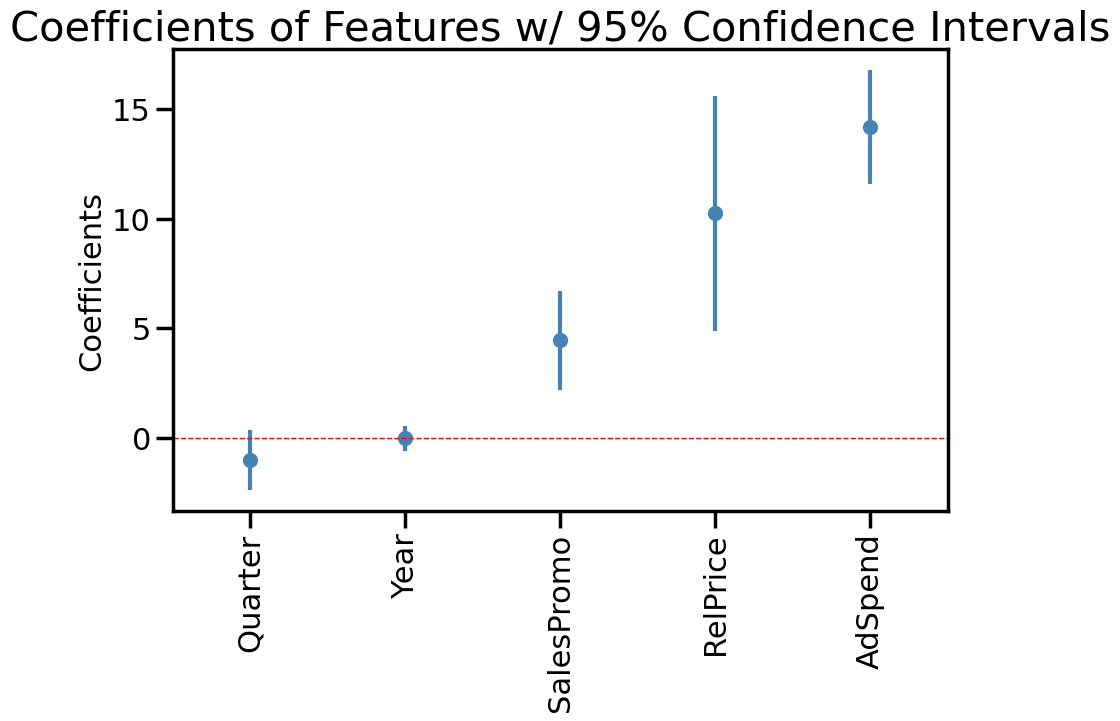

In [42]:
coefplot(linearRegression)

In [47]:
X = df_noout[[ 'Quarter',  'SalesPromo', 'AdSpend', 'RelPrice']]
X = sm.add_constant(X)
Y = df_noout.Sales
linearRegression = sm.OLS(Y, X).fit()
linearRegression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     56.76
Date:                Sat, 17 Jun 2023   Prob (F-statistic):           1.45e-13
Time:                        07:34:50   Log-Likelihood:                -96.301
No. Observations:                  35   AIC:                             202.6
Df Residuals:                      30   BIC:                             210.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.8362      3.457     19.914      0.000      61.777      75.896
Quarter       -1.0332      0.656     -1.576      0.125      -2.372       0.306
SalesPromo     4.4381      1.087      4.085      0.000       2.219       6.657
AdSpend       14.1716      1.246     11.372      0.000      11.627      16.717
RelPrice      10.2223      2.577      3.966      0.000       4.959      15.486
==============================================================================
Omnibus:                        8.295   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.003
Skew:                           1.034   Prob(JB):                       0.0302
Kurtosis:                       3.725   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/var/folders/lf/hsp4mkf14lv1k1qxwbvz70y00000gn/T/ipykernel_10798/3712453408.py:65: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


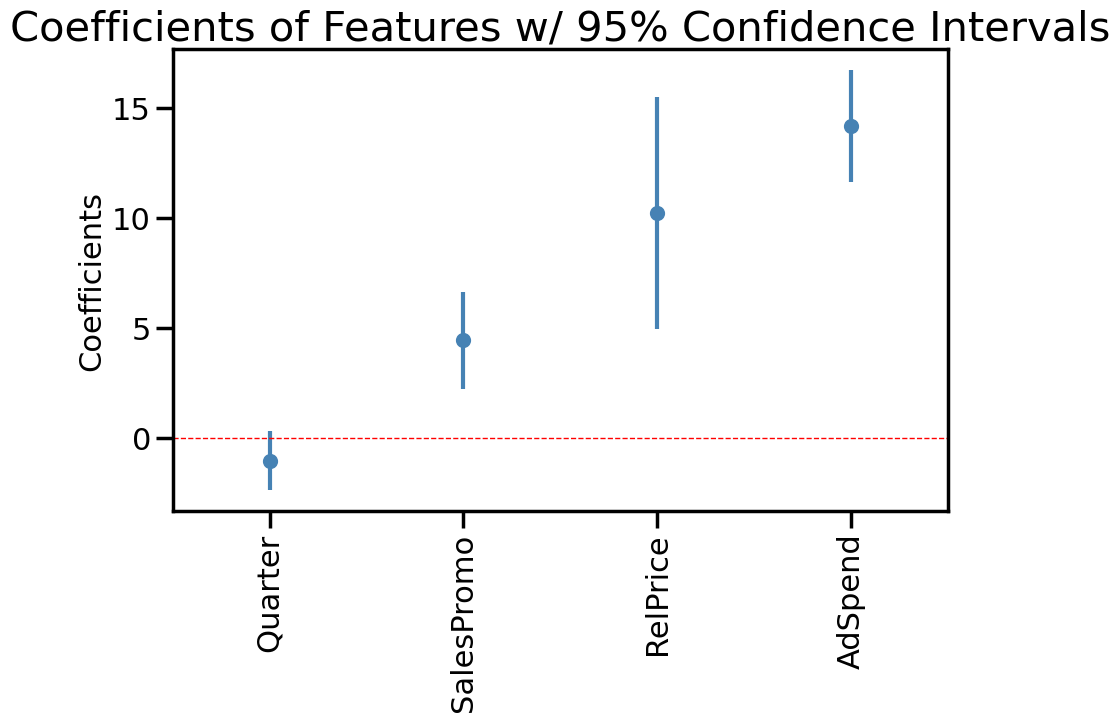

In [49]:
coefplot(linearRegression)

In [60]:
import numpy as np
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
y_test_predict = linearRegression.predict(X)
rmse = (np.sqrt(mean_squared_error(Y , y_test_predict)))
mae = mean_absolute_error(Y, y_test_predict)
r2 = r2_score(Y, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {:.2f}'.format(rmse))
print('Mean absolute err is {:.2f}'.format(mae))
print('R2 score is {:.2f}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 3.79
Mean absolute err is 2.94
R2 score is 0.88


In [101]:
type(X)

pandas.core.frame.DataFrame

In [104]:
max(X["AdSpend"].values)

2.8

In [105]:
X

,const,Quarter,SalesPromo,AdSpend,RelPrice
0,1.0,1,0.602118,0.0,1.1
1,1.0,2,0.208932,1.8,0.9
2,1.0,3,0.060245,2.8,0.1
3,1.0,4,0.002090,1.3,0.5
4,1.0,1,0.045102,1.4,0.6
5,1.0,2,0.316000,1.7,0.8
6,1.0,3,0.249390,2.7,1.0
7,1.0,4,0.225837,1.2,0.5
8,1.0,1,0.313921,1.5,0.7
9,1.0,2,0.265321,2.4,0.9


In [106]:
max(X["SalesPromo"].values)

4.0

In [109]:
np.mean(X["RelPrice"].values)

0.8657142857142858

In [63]:


68.8*1.0 -1.03*2 + 4.4*0.208 +1.8*14.1716 + 10.2*0.9

102.34407999999999

In [72]:
coef = [68.8, -1.03,  4.4, 14.176,10.2]
values = [1.0, 2, 0.208932, 1.8, 0.9]

In [75]:
def model_simulate(coef,values):
    pred_sales = 0
    for x1, x2 in zip(coef, values):

        pred_sales = pred_sales+x1*x2
    print(pred_sales)   
    return pred_sales

In [76]:
values = [1.0,4, 0.004999, 1.1, 0.7]

In [77]:
model_simulate(coef,values)

87.43559559999998


87.43559559999998

In [78]:
Y

0      92
1      99
2     115
3      85
4      88
5     101
6     114
7      89
8      97
9     109
10    116
11     86
12    103
13    109
14    115
15     94
16    108
17    113
18    114
19     87
20    107
21    101
22    114
23     86
24    102
25    112
26    115
27     84
28    107
29     98
30    115
31     88
32     98
34    115
35     85
Name: Sales, dtype: int64

In [79]:
# Double sales

In [85]:
find_value_for(coef,values)

76.83930079999999

In [110]:
regress_coeff = [68.8, -1.03,  4.4, 14.176,10.2]
coef = [68.8, -1.03,  4.4, 10.2]
values = [1.0, 3, 4, 0.86]
target_sales = 200

def find_value_for(coef, values,target_value, missing_coef):
    pred_sales = 0
    for x1, x2 in zip(coef, values):
        pred_sales = pred_sales+x1*x2
    return (target_value - pred_sales)/missing_coef


In [111]:

find_value_for(coef, values, target_sales,14.176)

7.612725733634312